In [1]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

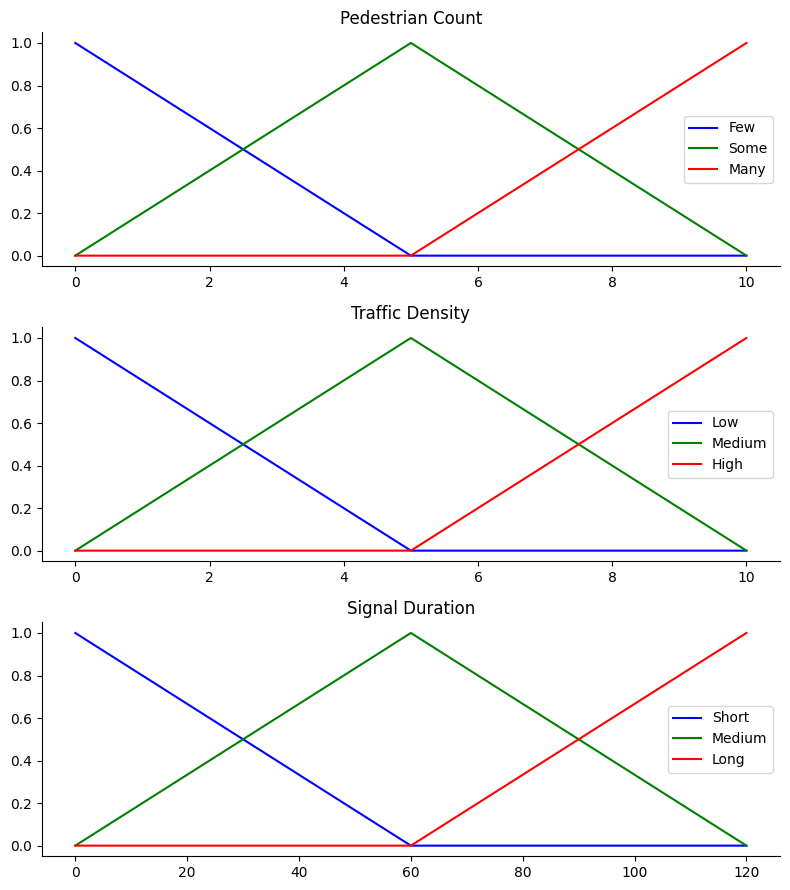

Recommended signal duration: 61.14285714285713 seconds


d:\Diskrit\sklearn-env\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


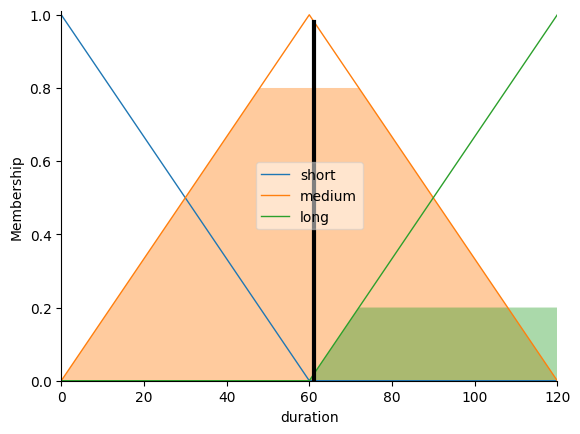

In [2]:
# Generate universe variables
#   * Pedestrian count and traffic density on subjective ranges [0, 10]
#   * Signal duration has a range of [0, 120] in units of seconds
x_pedestrian = np.arange(0, 11, 1)
x_traffic = np.arange(0, 11, 1)
x_duration = np.arange(0, 121, 1)

# Generate fuzzy membership functions
pedestrian_few = fuzz.trimf(x_pedestrian, [0, 0, 5])
pedestrian_some = fuzz.trimf(x_pedestrian, [0, 5, 10])
pedestrian_many = fuzz.trimf(x_pedestrian, [5, 10, 10])

traffic_low = fuzz.trimf(x_traffic, [0, 0, 5])
traffic_medium = fuzz.trimf(x_traffic, [0, 5, 10])
traffic_high = fuzz.trimf(x_traffic, [5, 10, 10])

duration_short = fuzz.trimf(x_duration, [0, 0, 60])
duration_medium = fuzz.trimf(x_duration, [0, 60, 120])
duration_long = fuzz.trimf(x_duration, [60, 120, 120])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_pedestrian, pedestrian_few, 'b', linewidth=1.5, label='Few')
ax0.plot(x_pedestrian, pedestrian_some, 'g', linewidth=1.5, label='Some')
ax0.plot(x_pedestrian, pedestrian_many, 'r', linewidth=1.5, label='Many')
ax0.set_title('Pedestrian Count')
ax0.legend()

ax1.plot(x_traffic, traffic_low, 'b', linewidth=1.5, label='Low')
ax1.plot(x_traffic, traffic_medium, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_traffic, traffic_high, 'r', linewidth=1.5, label='High')
ax1.set_title('Traffic Density')
ax1.legend()

ax2.plot(x_duration, duration_short, 'b', linewidth=1.5, label='Short')
ax2.plot(x_duration, duration_medium, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_duration, duration_long, 'r', linewidth=1.5, label='Long')
ax2.set_title('Signal Duration')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

# Fuzzy logic system
pedestrian = ctrl.Antecedent(x_pedestrian, 'pedestrian')
traffic = ctrl.Antecedent(x_traffic, 'traffic')
duration = ctrl.Consequent(x_duration, 'duration')

# Auto-membership function population is possible with .automf(3, 5, or 7)
pedestrian['few'] = pedestrian_few
pedestrian['some'] = pedestrian_some
pedestrian['many'] = pedestrian_many

traffic['low'] = traffic_low
traffic['medium'] = traffic_medium
traffic['high'] = traffic_high

duration['short'] = duration_short
duration['medium'] = duration_medium
duration['long'] = duration_long

# Define fuzzy rules
rule1 = ctrl.Rule(pedestrian['few'] & traffic['low'], duration['short'])
rule2 = ctrl.Rule(pedestrian['few'] & traffic['medium'], duration['short'])
rule3 = ctrl.Rule(pedestrian['few'] & traffic['high'], duration['medium'])
rule4 = ctrl.Rule(pedestrian['some'] & traffic['low'], duration['short'])
rule5 = ctrl.Rule(pedestrian['some'] & traffic['medium'], duration['medium'])
rule6 = ctrl.Rule(pedestrian['some'] & traffic['high'], duration['medium'])
rule7 = ctrl.Rule(pedestrian['many'] & traffic['low'], duration['medium'])
rule8 = ctrl.Rule(pedestrian['many'] & traffic['medium'], duration['long'])
rule9 = ctrl.Rule(pedestrian['many'] & traffic['high'], duration['long'])

# Control system creation and simulation
duration_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
duration_sim = ctrl.ControlSystemSimulation(duration_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: If using .automf(3, 5, or 7) membership functions, use .view() to view the functions
duration_sim.input['pedestrian'] = 6
duration_sim.input['traffic'] = 9

# Crunch the numbers
duration_sim.compute()

print(f"Recommended signal duration: {duration_sim.output['duration']} seconds")

# Visualize result
duration.view(sim=duration_sim)